In [1]:
import gmaps
import gmaps.datasets
gmaps.configure(api_key="")
from IPython.display import Image
import pandas as pd

events = pd.read_csv('events_month.csv')
trips = pd.read_csv('trips_month.csv')

#convert utc timestamp to local time
events['timestamp'] = pd.to_datetime(events['timestamp'])
events['pst'] = events['timestamp'].dt.tz_localize('UTC').dt.tz_convert('US/Pacific')

#add hour column
events['hour'] = events['pst'].dt.strftime('%-H') 
events['hour'] = events['hour'].astype(int)

events[events.delay > -60 ] = 0 #set early arrivals to 0, consider anything < 1 min delay an on-time arrival
events['abs_delay'] = events.delay*-1 #transform delays to positive values, gmaps can't accept negatives

In [2]:
#create df of events by hour
events_0 = events.loc[events['hour'] ==0]
events_1 = events.loc[events['hour'] ==1]
events_2 = events.loc[events['hour'] ==2]
events_3 = events.loc[events['hour'] ==3]
events_4 = events.loc[events['hour'] ==4]
events_5 = events.loc[events['hour'] ==5]
events_6 = events.loc[events['hour'] ==6]
events_7 = events.loc[events['hour'] ==7]
events_8 = events.loc[events['hour'] ==8]
events_9 = events.loc[events['hour'] ==9]
events_10 = events.loc[events['hour'] ==10]
events_11 = events.loc[events['hour'] ==11]
events_12 = events.loc[events['hour'] ==12]
events_13 = events.loc[events['hour'] ==13]
events_14 = events.loc[events['hour'] ==14]
events_15 = events.loc[events['hour'] ==15]
events_16 = events.loc[events['hour'] ==16]
events_17 = events.loc[events['hour'] ==17]
events_18 = events.loc[events['hour'] ==18]
events_19 = events.loc[events['hour'] ==19]
events_20 = events.loc[events['hour'] ==20]
events_21 = events.loc[events['hour'] ==21]
events_22 = events.loc[events['hour'] ==22]
events_23 = events.loc[events['hour'] ==23]

In [3]:
def gen_map(df):
    
    #configure map layout
    portland_coord = (45.51,-122.65)
    figure_layout = {
    'height': '500px'
    }
    fig = gmaps.figure(center=portland_coord, zoom_level=11, layout=figure_layout)

    #configure delay layer
    heatmap_layer = gmaps.heatmap_layer(
    df[['vehicle_location_latitude', 'vehicle_location_longitude']], weights=df['abs_delay'],
    max_intensity=50000, point_radius=8.0
    )
    
    #draw map
    fig.add_layer(heatmap_layer)
    return fig


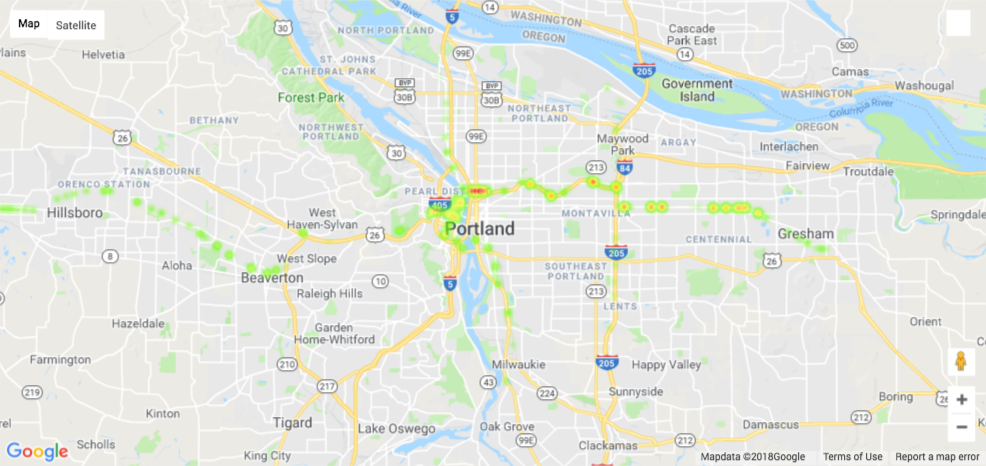

In [10]:
#4:00 AM 
gen_map(events_4) 

#since gmaps won't diplay in Github, show a saved image
Image(filename= "/Users/julieshih/workspace/Trimet-Analysis/images/hour04.png")

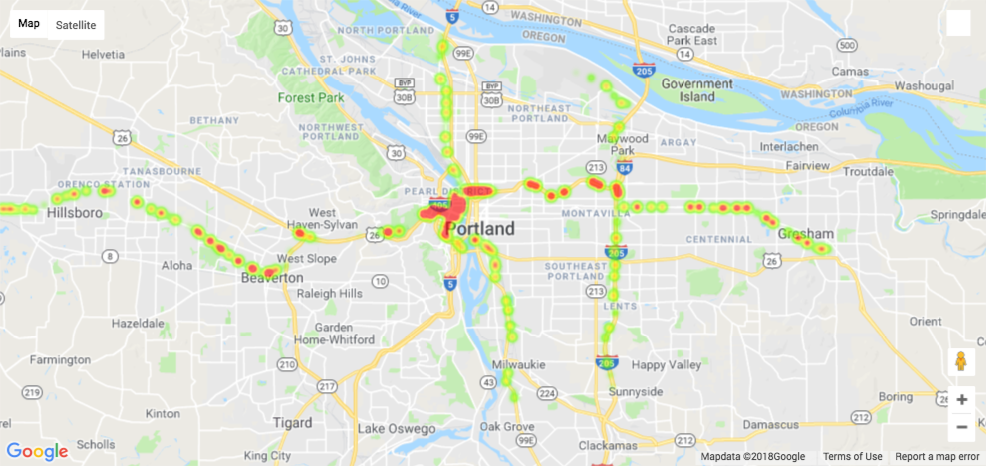

In [11]:
#8:00 AM, morning rush hour
gen_map(events_8)
Image(filename= "/Users/julieshih/workspace/Trimet-Analysis/images/hour08.png")

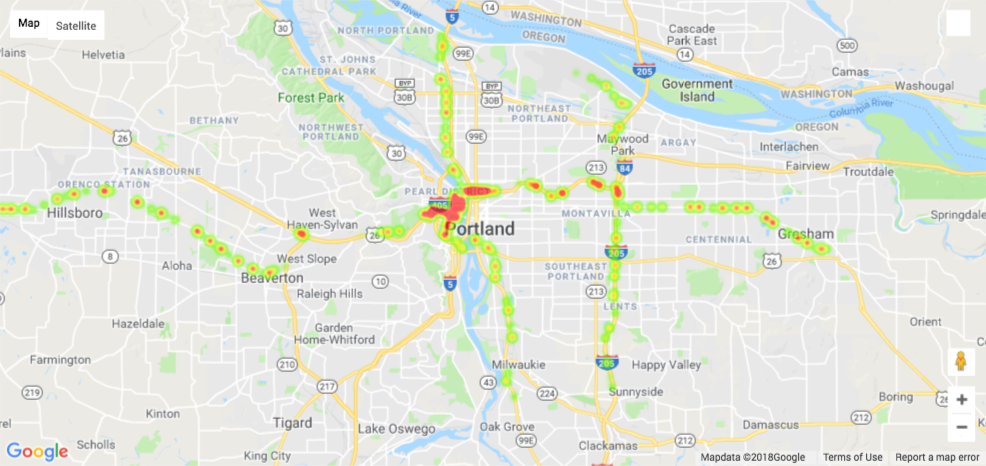

In [12]:
#12:00 PM, noon
gen_map(events_12)
Image(filename= "/Users/julieshih/workspace/Trimet-Analysis/images/hour12.png")

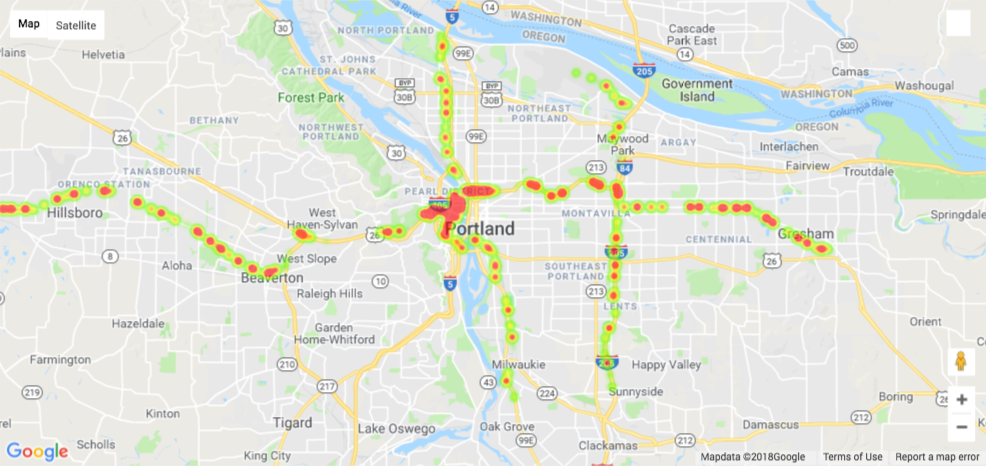

In [13]:
#6:00 PM, evening rush hour
gen_map(events_18)
Image(filename= "/Users/julieshih/workspace/Trimet-Analysis/images/hour18.png")

In [ ]:
# Documentation
#https://github.com/pbugnion/gmaps/blob/master/docs/source/install.rst
#http://jupyter-gmaps.readthedocs.io/en/latest/tutorial.html#base-maps